#Agentic AI - Market Research Team




## 2. Setup: Import libraries and load environment



In [ ]:
import sys
import os
from google.colab import userdata

# Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# Set your working directory to the folder containing your files
project_path = '/content/drive/My Drive/LLM/Ng/MRT'
os.chdir(project_path)
sys.path.append(project_path)

# Confirm it worked
print("Current directory:", os.getcwd())
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current directory: /content/drive/My Drive/LLM/Ng/MRT
inventory_utils.py  M5_UGL_2.ipynb  __pycache__  tools.py  utils.py


In [ ]:
!pip install aisuite[openai] -q
!pip install tavily-python -q

In [ ]:
#TOOLs
# ================================
# Standard library imports
# ================================
import base64
import json
from html import escape
from typing import Any

# ================================
# Third-party imports
# ================================
import pandas as pd
from IPython.display import display, HTML


def render_pretty_table_html(df: pd.DataFrame, title: str = "Data Table") -> str:
    table_html = df.to_html(index=False, classes="styled-table")
    return f"""
    <style>
      .styled-table {{
        border-collapse: collapse;
        margin: 20px 0;
        font-size: 14px;
        width: 100%;
        color: black;
        box-shadow: 0 0 5px rgba(0,0,0,0.1);
      }}
      .styled-table th, .styled-table td {{
        border: 1px solid #ddd;
        padding: 8px;
      }}
      .styled-table th {{
        background-color: #007acc;
        color: white;
        text-align: left;
      }}
      .styled-table tr:nth-child(even) {{ background-color: #e6f4ff; }}
      .styled-table tr:nth-child(odd)  {{ background-color: white;    }}
    </style>
    <h3>{escape(title)}</h3>
    {table_html}
    """


def format_logs_as_pretty_html(logs: list[dict], logo_path: str = "dl_logo.jpg") -> str:
    status_styles = {
        "success": {"bg": "#e0f0ff", "color": "#000000"},
        "fixed":   {"bg": "#fffbe6", "color": "#333333"},
        "error":   {"bg": "#ffe6e6", "color": "#000000"},
    }
    card_blocks = ""
    for log in logs:
        status = log.get("status", "success")
        style = status_styles.get(status, {"bg": "#f4f4f4", "color": "#000000"})
        bg, text_color = style["bg"], style["color"]
        step = escape(str(log.get("step", "")))
        desc = escape(str(log.get("description", "")))
        stxt = escape(str(status))
        card_blocks += f"""
        <div style="display:flex;align-items:center;background-color:{bg};margin:12px 0;
                    padding:12px 16px;border-radius:8px;box-shadow:2px 2px 5px rgba(0,0,0,0.05);">
          <img src="https://coursera-university-assets.s3.amazonaws.com/b4/5cb90bb92f420b99bf323a0356f451/Icon.png"
               alt="Logo" style="height:60px;margin-right:16px;border-radius:6px;"/>
          <div style="color:{text_color};">
            <h3 style="margin:0 0 4px 0;">Step {step}</h3>
            <p style="margin:4px 0;font-size:14px;">{desc}</p>
            <p style="margin:4px 0;"><strong>Status:</strong> <code>{stxt}</code></p>
          </div>
        </div>
        """
    return f"""
    <div style="font-family:Arial,sans-serif;max-width:800px;margin:auto;">
      <div style="text-align:center;padding:20px 0;">
        <img src="https://learn.deeplearning.ai/assets/dlai-logo.png" alt="Logo" style="max-height:80px;"/>
        <h2 style="margin-top:10px;">Customer Return Workflow Summary</h2>
      </div>
      {card_blocks}
    </div>
    """


def render_image_with_quote_html(image_url: str, quote: str, width: int = 512) -> None:
    html = f"""
    <div style="position:relative;width:{width}px;margin-bottom:20px;">
      <img src="{escape(image_url)}" style="width:100%;border-radius:8px;display:block;">
      <div style="
          position:absolute;bottom:20px;left:50%;transform:translateX(-50%);
          background:rgba(0,0,0,0.6);color:white;padding:10px 20px;border-radius:8px;
          font-size:1.2em;font-family:'Segoe UI',sans-serif;font-weight:500;text-align:center;
          text-shadow:1px 1px 4px #000;">
        {escape(quote)}
      </div>
    </div>
    """
    display(HTML(html))


def log_tool_call_html(tool_name: str, arguments: Any) -> None:
    display(HTML(f"""
      <div style="border-left:4px solid #1976D2;padding:.8em;margin:1em 0;
                  background-color:#e3f2fd;color:#0D47A1;font-family:'Segoe UI',sans-serif;">
        <div style="font-size:15px;font-weight:bold;margin-bottom:4px;">
          📞 <span style="color:#0B3D91;">Tool Call:</span> <span style="color:#0B3D91;">{escape(str(tool_name))}</span>
        </div>
        <code style="display:block;background:#e8f0fe;color:#1b1b1b;padding:6px;border-radius:4px;
                     font-size:13px;white-space:pre-wrap;">{escape(str(arguments))}</code>
      </div>
    """))


def log_tool_result_html(result: Any) -> None:
    display(HTML(f"""
      <div style="border-left:4px solid #558B2F;padding:.8em;margin:1em 0;
                  background-color:#f1f8e9;color:#33691E;">
        <strong>✅ Tool Result:</strong>
        <pre style="white-space:pre-wrap;font-size:13px;color:#2E7D32;">{escape(str(result))}</pre>
      </div>
    """))


def log_final_summary_html(content: str) -> None:
    display(HTML(f"""
      <div style="border-left:4px solid #2E7D32;padding:1em;margin:1em 0;
                  background-color:#e8f5e9;color:#1B5E20;">
        <strong>✅ Final Summary:</strong>
        <pre style="white-space:pre-wrap;font-size:13px;color:#1B5E20;">{escape(content.strip())}</pre>
      </div>
    """))


def log_unexpected_html() -> None:
    display(HTML("""
      <div style="border-left:4px solid #F57C00;padding:1em;margin:1em 0;
                  background-color:#fff3e0;color:#E65100;">
        <strong>⚠️ Unexpected:</strong> No tool_calls or content returned.
      </div>
    """))


def log_agent_title_html(title: str, icon: str = "🕵️‍♂️") -> None:
    display(HTML(f"""
      <div style="padding:1em;margin:1em 0;background-color:#f0f4f8;border-left:6px solid #1976D2;">
        <h2 style="margin:0;color:#0D47A1;font-family:'Segoe UI',sans-serif;">
          {escape(icon)} {escape(title)}
        </h2>
      </div>
    """))


def print_html(content: Any, title: str | None = None, is_image: bool = False) -> None:
    """
    Pretty-print inside a styled card.
    - If is_image=True and content is a string: treat as image path/URL and render <img>.
    - If content is a pandas DataFrame/Series: render as an HTML table.
    - Otherwise (strings): show as code/text in <pre><code>.
    """
    def image_to_base64(image_path: str) -> str:
        with open(image_path, "rb") as img_file:
            return base64.b64encode(img_file.read()).decode("utf-8")

    if is_image and isinstance(content, str):
        b64 = image_to_base64(content)
        rendered = f'<img src="data:image/png;base64,{b64}" alt="Image" style="max-width:100%;height:auto;border-radius:8px;">'
    elif isinstance(content, pd.DataFrame):
        rendered = content.to_html(classes="pretty-table", index=False, border=0, escape=False)
    elif isinstance(content, pd.Series):
        rendered = content.to_frame().to_html(classes="pretty-table", border=0, escape=False)
    elif isinstance(content, str):
        rendered = f"<pre><code>{escape(content)}</code></pre>"
    else:
        rendered = f"<pre><code>{escape(str(content))}</code></pre>"

    css = """
    <style>
      .pretty-card{
        font-family: ui-sans-serif, system-ui;
        border: 2px solid transparent;
        border-radius: 14px;
        padding: 14px 16px;
        margin: 10px 0;
        background: linear-gradient(#fff, #fff) padding-box,
                    linear-gradient(135deg, #3b82f6, #9333ea) border-box;
        color: #111;
        box-shadow: 0 4px 12px rgba(0,0,0,.08);
      }
      .pretty-title{
        font-weight:700;
        margin-bottom:8px;
        font-size:14px;
        color:#111;
      }
      /* 🔒 Scopeado SOLO a la tarjeta */
      .pretty-card pre,
      .pretty-card code {
        background: #f3f4f6;
        color: #111;
        padding: 8px;
        border-radius: 8px;
        display: block;
        overflow-x: auto;
        font-size: 13px;
        white-space: pre-wrap;
      }
      .pretty-card img { max-width:100%; height:auto; border-radius:8px; }
      .pretty-card table.pretty-table {
        border-collapse: collapse;
        width: 100%;
        font-size: 13px;
        color: #111;
      }
      .pretty-card table.pretty-table th,
      .pretty-card table.pretty-table td {
        border: 1px solid #e5e7eb;
        padding: 6px 8px;
        text-align: left;
      }
      .pretty-card table.pretty-table th { background: #f9fafb; font-weight: 600; }
    </style>
    """
    title_html = f'<div class="pretty-title">{escape(title)}</div>' if title else ""
    card = f'<div class="pretty-card">{title_html}{rendered}</div>'
    display(HTML(css + card))

In [ ]:
# TOOLS
import requests
import os
import json
from dotenv import load_dotenv
from tavily import TavilyClient
import pandas as pd

from inventory_utils import create_inventory_dataframe

# Session setup (optional)
session = requests.Session()
session.headers.update({
    "User-Agent": "LF-ADP-Agent/1.0 (mailto:your.email@example.com)"
})

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
# os.environ["DLAI_TAVILY_BASE_URL"] = userdata.get('DLAI_TAVILY_BASE_URL')

load_dotenv()

# 🔧 TOOL IMPLEMENTATIONS

def tavily_search_tool(query: str, max_results: int = 5, include_images: bool = False) -> list[dict[str, str]]:

    params = {}
    api_key = os.getenv("TAVILY_API_KEY")
    if not api_key:
        raise ValueError("TAVILY_API_KEY not found in environment variables.")
    params['api_key'] = api_key

    #client = TavilyClient(api_key)

    api_base_url = os.getenv("DLAI_TAVILY_BASE_URL")
    if api_base_url:
        params['api_base_url'] = api_base_url

    client = TavilyClient(api_key=api_key, api_base_url=api_base_url)

    try:
        response = client.search(
            query=query,
            max_results=max_results,
            include_images=include_images
        )

        results = []
        for r in response.get("results", []):
            results.append({
                "title": r.get("title", ""),
                "content": r.get("content", ""),
                "url": r.get("url", "")
            })

        if include_images:
            for img_url in response.get("images", []):
                results.append({"image_url": img_url})

        return results

    except Exception as e:
        return [{"error": str(e)}]


def product_catalog_tool(max_items: int = 10) -> list[dict[str, str]]:
    inventory_df = create_inventory_dataframe()
    return inventory_df.head(max_items).to_dict(orient="records")


# 🧠 TOOL METADATA FOR LLM

def get_available_tools():
    return [
        {
            "type": "function",
            "function": {
                "name": "tavily_search_tool",
                "description": "Perform web search for sunglasses trends using Tavily.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {"type": "string", "description": "Search query"},
                        "max_results": {"type": "integer", "default": 5},
                        "include_images": {"type": "boolean", "default": False}
                    },
                    "required": ["query"]
                }
            }
        },
        {
            "type": "function",
            "function": {
                "name": "product_catalog_tool",
                "description": "Get sunglasses products from internal inventory.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "max_items": {"type": "integer", "default": 10}
                    }
                }
            }
        }
    ]


# 🔁 TOOL CALL DISPATCHER

def handle_tool_call(tool_call):
    function_name = tool_call.function.name
    arguments = json.loads(tool_call.function.arguments)

    tools_map = {
        "tavily_search_tool": tavily_search_tool,
        "product_catalog_tool": product_catalog_tool,
    }

    return tools_map[function_name](**arguments)


def create_tool_response_message(tool_call, tool_result):
    return {
        "role": "tool",
        "tool_call_id": tool_call.id,
        "name": tool_call.function.name,
        "content": json.dumps(tool_result)
    }

In [ ]:
# =========================
# Imports
# =========================

# --- Standard library ---
import base64
import json
import os
import re
from datetime import datetime
from io import BytesIO

# --- Third-party ---
import requests
import openai
from PIL import Image
from dotenv import load_dotenv
from IPython.display import Markdown, display
import aisuite

# --- Local / project ---
import tools
# import utils


# =========================
# Environment & Client
# =========================
load_dotenv()
client = aisuite.Client()


In [ ]:
tools.tavily_search_tool('trends in sunglasses fashion')
# tools.tavily_search_tool('marketing trends in the non-profit industry in USA in 2025')

[{'title': 'Sunglasses from runways Fall 2025 Winter 2026 - YouTube',
  'content': "Sunglasses from runways Fall 2025 Winter 2026\nMM Design\n35500 subscribers\n266 likes\n7303 views\n20 Jul 2025\nYear-Round Sunglasses: Trends and Tips for Fall 2025 Winter 2026\n\nIn this episode of MM Design, Maria takes us through the must-have sunglasses trends spotted on the fall and winter 2025-2026 runways. From classic Aviator Glasses and retro-inspired oversized models to trendy tinted and sporty wraparound styles, you'll discover which frames best suit different face shapes and personal styles. Maria also shares practical advice on how to style these sunglasses to enhance any outfit, as well as insights into the versatility of prescription frames making a comeback. Tune in for expert tips on staying fashionable and well-protected all year round!\n\n00:00 Introduction to Year-Round Sunglasses\n01:22 Aviator Glasses\n02:53 Oversized Sunglasses: A Comeback\n04:43 Oval Shaped Sunglasses\n07:08 Nar

In [ ]:
tools.product_catalog_tool()

[{'name': 'Aviator',
  'item_id': 'SG001',
  'description': 'Originally designed for pilots, these teardrop-shaped lenses with thin metal frames offer timeless appeal. The large lenses provide excellent coverage while the lightweight construction ensures comfort during long wear.',
  'quantity_in_stock': 23,
  'price': 103},
 {'name': 'Wayfarer',
  'item_id': 'SG002',
  'description': 'Featuring thick, angular frames that make a statement, these sunglasses combine retro charm with modern edge. The rectangular lenses and sturdy acetate construction create a confident look.',
  'quantity_in_stock': 6,
  'price': 92},
 {'name': 'Mystique',
  'item_id': 'SG003',
  'description': 'Inspired by 1950s glamour, these frames sweep upward at the outer corners to create an elegant, feminine silhouette. The subtle curves and often embellished temples add sophistication to any outfit.',
  'quantity_in_stock': 3,
  'price': 88},
 {'name': 'Sport',
  'item_id': 'SG004',
  'description': 'Designed for 

### 4.1. Market Research Agent  



In [ ]:
def market_research_agent(return_messages: bool = False):

    log_agent_title_html("Market Research Agent", "🕵️‍♂️")

    prompt_ = f"""
You are a fashion market research agent tasked with preparing a trend analysis for a summer sunglasses campaign.

Your goal:
1. Explore current fashion trends related to sunglasses using web search.
2. Review the internal product catalog to identify items that align with those trends.
3. Recommend one or more products from the catalog that best match emerging trends.
4. If needed, today date is {datetime.now().strftime("%Y-%m-%d")}.

You can call the following tools:
- tavily_search_tool: to discover external web trends.
- product_catalog_tool: to inspect the internal sunglasses catalog.

Once your analysis is complete, summarize:
- The top 2–3 trends you found.
- The product(s) from the catalog that fit these trends.
- A justification of why they are a good fit for the summer campaign.
"""
    messages = [{"role": "user", "content": prompt_}]
    tools_ = tools.get_available_tools()

    while True:
        response = client.chat.completions.create(
            model="openai:o4-mini",
            messages=messages,
            tools=tools_,
            tool_choice="auto"
        )

        msg = response.choices[0].message

        if msg.content:
            log_final_summary_html(msg.content)
            return (msg.content, messages) if return_messages else msg.content

        if msg.tool_calls:
            for tool_call in msg.tool_calls:
                log_tool_call_html(tool_call.function.name, tool_call.function.arguments)
                result = tools.handle_tool_call(tool_call)
                log_tool_result_html(result)

                messages.append(msg)
                messages.append(tools.create_tool_response_message(tool_call, result))
        else:
            log_unexpected_html()
            return ("[⚠️ Unexpected: No tool_calls or content returned]", messages) if return_messages else "[⚠️ Unexpected: No tool_calls or content returned]"

In [ ]:
market_research_result = market_research_agent()

In [ ]:
def graphic_designer_agent(trend_insights: str, caption_style: str = "short punchy", size: str = "1024x1024") -> dict:

    """
    Uses aisuite to generate a marketing prompt/caption and OpenAI (directly) to generate the image.

    Args:
        trend_insights (str): Trend summary from the researcher agent.
        caption_style (str): Optional style hint for caption.
        size (str): Image resolution (e.g., '1024x1024').

    Returns:
        dict: A dictionary with image_url, prompt, and caption.
    """

    log_agent_title_html("Graphic Designer Agent", "🎨")

    # Step 1: Generate prompt and caption using aisuite
    system_message = (
        "You are a visual marketing assistant. Based on the input trend insights, "
        "write a creative and visual prompt for an AI image generation model, and also a short caption."
    )

    user_prompt = f"""
Trend insights:
{trend_insights}

Please output:
1. A vivid, descriptive prompt to guide image generation.
2. A marketing caption in style: {caption_style}.

Respond in this format:
{{"prompt": "...", "caption": "..."}}
"""

    chat_response = client.chat.completions.create(
        model="openai:o4-mini",
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_prompt}
        ]
    )

    content = chat_response.choices[0].message.content.strip()
    match = re.search(r'\{.*\}', content, re.DOTALL)
    parsed = json.loads(match.group(0)) if match else {"error": "No JSON returned", "raw": content}

    prompt = parsed["prompt"]
    caption = parsed["caption"]

    # Step 2: Generate image directly using openai-python
    openai_client = openai.OpenAI()

    image_response = openai_client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size=size,
        quality="standard",
        n=1,
        response_format="url"
    )

    image_url = image_response.data[0].url

    # Save image locally
    img_bytes = requests.get(image_url).content
    img = Image.open(BytesIO(img_bytes))

    image_path = "/content/generated_campaign.png"
    img.save(image_path)


    from IPython.display import Image as IPyImage, display
    display(IPyImage(filename=image_path))
    print(f"✅ Image saved and displayed from: {image_path}")


    # Log summary with local image
    log_final_summary_html(f"""
        <h3>Generated Image and Caption</h3>

        <p><strong>Image Path:</strong> <code>{image_path}</code></p>

        <p><strong>Generated Image:</strong></p>
        <img src="{image_path}" alt="Generated Image" style="max-width: 100%; height: auto; border: 1px solid #ccc; border-radius: 8px; margin-top: 10px; margin-bottom: 10px;">

        <p><strong>Prompt:</strong> {prompt}</p>
    """)


    return {
        "image_url": image_url,
        "prompt": prompt,
        "caption": caption,
        "image_path": image_path
    }



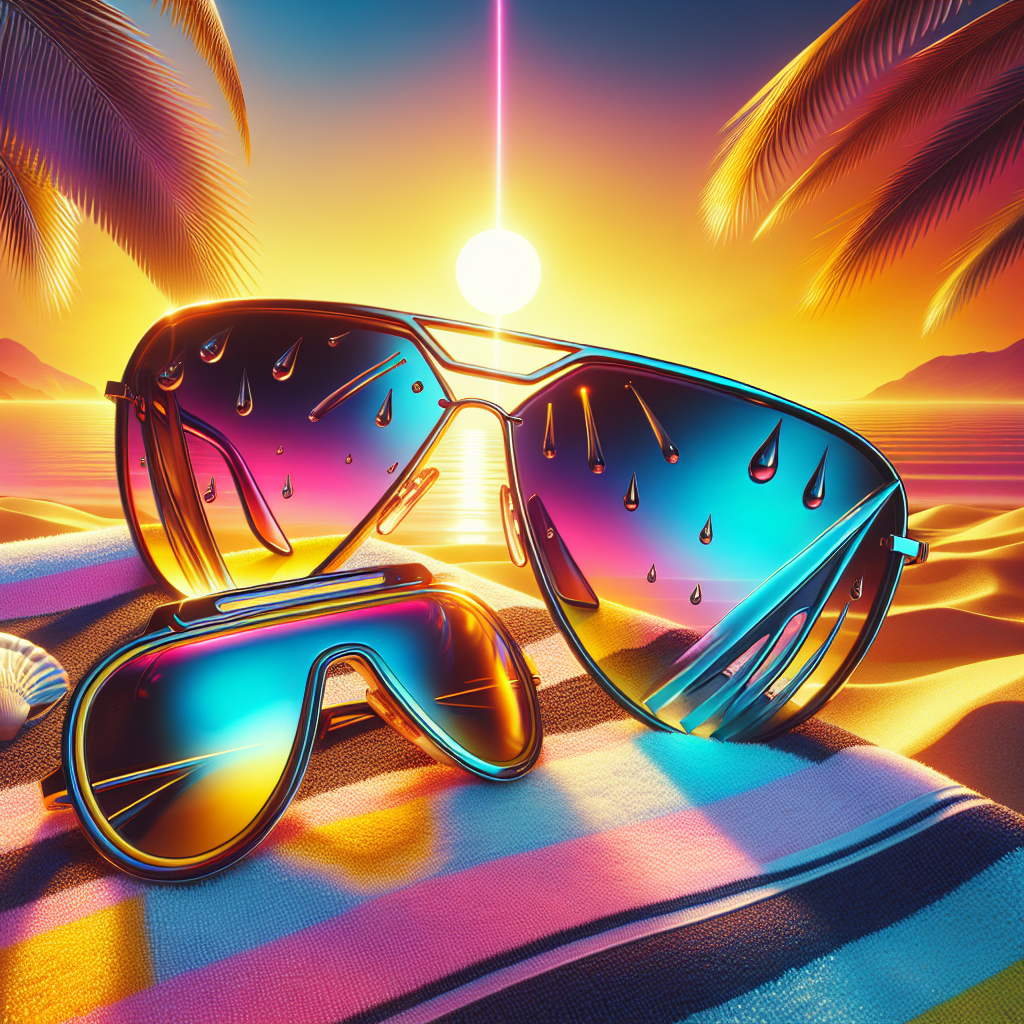

✅ Image saved and displayed from: /content/generated_campaign.png


In [ ]:
graphic_designer_agent_result = graphic_designer_agent(
    trend_insights=market_research_result,
)


In [ ]:
def copywriter_agent(image_path: str, trend_summary: str, model: str = "openai:o4-mini") -> dict:

    """
    Uses aisuite (OpenAI only) to send an image and a trend summary and return a campaign quote.

    Args:
        image_path (str): URL of the image to be analyzed.
        trend_summary (str): Text from the researcher agent.
        model (str): OpenAI model (e.g., openai:o4-mini, openai:gpt-4o)

    Returns:
        dict: {
            "quote": "...",
            "justification": "...",
            "image_path": "..."
        }
    """

    log_agent_title_html("Copywriter Agent", "✍️")

    # Step 1: Load local image and encode as base64
    with open(image_path, "rb") as f:
        img_bytes = f.read()

    b64_img = base64.b64encode(img_bytes).decode("utf-8")

    # Step 2: Build OpenAI-compliant multimodal message
    messages = [
        {
            "role": "system",
            "content": "You are a copywriter that creates elegant campaign quotes based on an image and a marketing trend summary."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{b64_img}",
                        "detail": "auto"
                    }
                },
                {
                    "type": "text",
                    "text": f"""
Here is a visual marketing image and a trend analysis:

Trend summary:
\"\"\"{trend_summary}\"\"\"

Please return a JSON object like:
{{
  "quote": "A short, elegant campaign phrase (max 12 words)",
  "justification": "Why this quote matches the image and trend"
}}"""
                }
            ]
        }
    ]

    # Step 3: Send request via aisuite
    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )

    # Step 4: Parse JSON response
    content = response.choices[0].message.content.strip()

    log_final_summary_html(content)

    try:
        match = re.search(r'\{.*\}', content, re.DOTALL)
        parsed = json.loads(match.group(0)) if match else {"error": "No valid JSON returned"}
    except Exception as e:
        parsed = {"error": f"Failed to parse: {e}", "raw": content}


    parsed["image_path"] = image_path
    return parsed


In [ ]:
copywriter_agent_result = copywriter_agent(
    image_path=graphic_designer_agent_result["image_path"],
    trend_summary=market_research_result,
)

In [ ]:
def packaging_agent(trend_summary: str, image_url: str, quote: str, justification: str, output_path: str = "campaign_summary.md") -> str:

    """
    Packages the campaign assets into a beautifully formatted markdown report for executive review.

    Args:
        trend_summary (str): Summary of the market trends.
        image_url (str): URL of the campaign image.
        quote (str): Marketing quote to overlay.
        justification (str): Explanation for the quote.
        output_path (str): Path to save the markdown report.

    Returns:
        str: Path to the saved markdown file.
    """

    log_agent_title_html("Packaging Agent", "📦")

    # We use this path in the src of the <img>
    styled_image_html = f"""
![Open the generated file to see]({image_url})
    """

    beautified_summary = client.chat.completions.create(
        model="openai:o4-mini",
        messages=[
            {"role": "system", "content": "You are a marketing communication expert writing elegant campaign summaries for executives."},
            {"role": "user", "content": f"""
Please rewrite the following trend summary to be clear, professional, and engaging for a CEO audience:

\"\"\"{trend_summary.strip()}\"\"\"
"""}
        ]
    ).choices[0].message.content.strip()

    log_tool_result_html(beautified_summary)

    # Combine all parts into markdown
    markdown_content = f"""# 🕶️ Summer Sunglasses Campaign – Executive Summary

## 📊 Refined Trend Insights
{beautified_summary}

## 🎯 Campaign Visual
{styled_image_html}

## ✍️ Campaign Quote
{quote.strip()}

## ✅ Why This Works
{justification.strip()}

---

*Report generated on {datetime.now().strftime('%Y-%m-%d')}*
"""

    with open(output_path, "w", encoding="utf-8") as f:
        f.write(markdown_content)

    return output_path



In [ ]:
packaging_agent_result = packaging_agent(
    trend_summary=market_research_result,
    # image_url=graphic_designer_agent_result["image_path"],
    image_url=graphic_designer_agent_result["image_url"],
    quote=copywriter_agent_result["quote"],
    justification=copywriter_agent_result["justification"],
    output_path=f"campaign_summary_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.md"
)

In [ ]:
# Load and render the markdown content
with open(packaging_agent_result, "r", encoding="utf-8") as f:
    md_content = f.read()

display(Markdown(md_content))


# 🕶️ Summer Sunglasses Campaign – Executive Summary

## 📊 Refined Trend Insights
Summer 2025 Sunglasses Campaign: Executive Trend Summary

Overview  
As we plan our Summer 2025 launch, three dominant eyewear trends have emerged—oversized silhouettes, futuristic sport-inspired shields, and enduring retro classics. By aligning our core models with these insights, we can capture broad consumer interest and reinforce our position at the forefront of summer style.

1. Market Trends  
 • Oversized & “Bug-Eye” Silhouettes  
   – Bold, wrap-around frames with generously proportioned lenses are appearing across landmark runway shows and street-style features.  
 • Futuristic Wraparounds & Shield Shades  
   – Sleek, one-piece lenses and sporty shield styles are resurging, driven by athleisure and performance-wear collaborations.  
 • Timeless Retro Shapes: Wayfarer & Aviator  
   – Classic profiles retain strength in the market, refreshed this season with contemporary colorways and refined material finishes.

2. Our Featured Models  
 • SG001 Aviator  
   – Large, teardrop lenses in a slim metal frame for instant recognition and superior coverage. Lightweight design ensures all-day comfort.  
 • SG002 Wayfarer  
   – Strong acetate build with angular lines, delivering retro appeal and modern edge—perfect for urban summer styling.  
 • SG004 Sport  
   – One-piece curved lens and flexible frame with rubberized grips—engineered for beach, poolside, and active-lifestyle wear.

3. Strategic Rationale  
Aligning our three best-in-class models with these trends delivers:  
 • Oversized Drama (SG001): Leverages a universally recognized silhouette to meet elevated “big lens” demand.  
 • Retro Revival (SG002): Taps ongoing nostalgia for vintage shapes with a durable, fashion-forward twist.  
 • Performance Innovation (SG004): Addresses growing appetite for futuristic, sport-ready eyewear in leisure environments.

By combining these styles, we ensure comprehensive coverage of summer’s top consumer priorities—statement-making design, timeless appeal, and active-lifestyle functionality—positioning our brand for maximum reach and impact.

## 🎯 Campaign Visual

![Open the generated file to see](https://oaidalleapiprodscus.blob.core.windows.net/private/org-07bMEYRlP5YkKXJXqs13Qvin/user-nBPg8q0oUE0F7oZjOhsk1QqB/img-ZnfPy3UOpzjxvrqVe2fuYSTh.png?st=2025-10-13T18%3A23%3A01Z&se=2025-10-13T20%3A23%3A01Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=c6569cb0-0faa-463d-9694-97df3dc1dfb1&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-10-13T18%3A22%3A12Z&ske=2025-10-14T18%3A22%3A12Z&sks=b&skv=2024-08-04&sig=P/Dgxeh4nYju1TvH0/gA5UPetw%2By%2BZyoZanJ7zgQbzE%3D)
    

## ✍️ Campaign Quote
Bold Oversized Shades: Futuristic Flair, Timeless Cool

## ✅ Why This Works
This phrase reflects the image’s neon-drenched, oversized silhouettes and futuristic wraparound reflections while nodding to the enduring aviator and wayfarer classics. It captures the summer-2025 demand for bold, statement-making frames (SG001), sporty shield styles (SG004), and timeless cool (SG002).

---

*Report generated on 2025-10-13*


In [ ]:
def run_sunglasses_campaign_pipeline(output_path: str = "campaign_summary.md") -> dict:
    """
    Runs the full summer sunglasses campaign pipeline:
    1. Market research (search trends + match products)
    2. Generate visual + caption
    3. Generate quote based on image + trend
    4. Create executive markdown report

    Returns:
        dict: Dictionary containing all intermediate results + path to final report
    """
    # 1. Run market research agent
    trend_summary = market_research_agent()
    print("✅ Market research completed")

    # 2. Generate image + caption
    visual_result = graphic_designer_agent(trend_insights=trend_summary)
    image_path = visual_result["image_path"]
    print("🖼️ Image generated")

    # 3. Generate quote based on image + trends
    quote_result = copywriter_agent(image_path=image_path, trend_summary=trend_summary)
    quote = quote_result.get("quote", "")
    justification = quote_result.get("justification", "")
    print("💬 Quote created")

    # 4. Generate markdown report
    md_path = packaging_agent(
        trend_summary=trend_summary,
        image_url=image_path,
        quote=quote,
        justification=justification,
        output_path=f"campaign_summary_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.md"
    )

    print(f"📦 Report generated: {md_path}")

    return {
        "trend_summary": trend_summary,
        "visual": visual_result,
        "quote": quote_result,
        "markdown_path": md_path
    }


In [ ]:
results = run_sunglasses_campaign_pipeline()

✅ Market research completed


🖼️ Image generated


💬 Quote created


📦 Report generated: campaign_summary_2025-10-13_19-06-28.md


In [ ]:
with open(results["markdown_path"], "r", encoding="utf-8") as f:
    md_content = f.read()
display(Markdown(md_content))


# 🕶️ Summer Sunglasses Campaign – Executive Summary

## 📊 Refined Trend Insights
Subject: Summer 2025 Sunglasses Trends & Campaign Recommendation

On October 13, 2025, our trend analysis identified three dominant summer eyewear movements—Aviator revival, oversized/“bug-eyed” silhouettes and retro shapes (Wayfarer & Cat-Eye)—each presenting a clear opportunity to drive brand momentum and sales.

1. Key Trends  
 • Aviator Revival  
   – The iconic teardrop lens returns, celebrated for its full-coverage performance and timeless pilot heritage.  
 • Oversized Silhouettes  
   – Generous, statement-making frames are commanding runways and street style, blending maximal sun protection with visual impact.  
 • Retro Shapes (Wayfarer & Cat-Eye)  
   – Wayfarers continue their celebrity-endorsed reign with bold, angular lines. Cat-eyes offer a polished, feminine flair thanks to their upward-swept corners and refined detailing.

2. Product Alignment  
 • SG001 “Aviator” | $103 | Stock: 23  
   – Lightweight metal frame, classic teardrop lenses, UV-optimized full coverage—perfect for trend-driven authenticity.  
 • SG002 “Wayfarer” | $92 | Stock: 6  
   – Oversized acetate frame with angular lenses; delivers the retro-modern statement essential for digital and in-store storytelling.  
 • SG003 “Mystique” | $88 | Stock: 3  
   – Cat-eye silhouette with subtly embellished temples; caters to style-conscious customers seeking a sophisticated, feminine edge.

3. Campaign Rationale  
 • Comprehensive Trend Coverage: Strategically spans heritage revival, bold statements and nostalgic glamour.  
 • Visual Impact: Each style photographs exceptionally well for social channels and retail displays.  
 • Functional Appeal: Superior UV protection, secure fit and durable construction address active, sun-soaked lifestyles.

Recommendation  
Feature SG001, SG002 and SG003 as the cornerstone styles of your Summer 2025 sunglasses campaign. This focused lineup will maximize trend relevance, elevate brand position and drive accelerated sales.

## 🎯 Campaign Visual

![Open the generated file to see](img-kQUlcjGCKFom3Ck1tWyC4gal.png)
    

## ✍️ Campaign Quote
Summer's Essentials: Aviators, Oversized Wayfarers, Glam Cat-Eyes

## ✅ Why This Works
This phrase captures the three key silhouettes featured in the image—classic Aviators, statement-making Wayfarers and retro-glam Cat-Eyes—while evoking the sun-drenched, stylish spirit of summer and aligning perfectly with the 2025 trend pillars.

---

*Report generated on 2025-10-13*
